# Aula 1 - Imersão Alura 

## Importando dados

In [151]:
import pandas as pd # Biblioteca utilizada para importar/ler os dados

#url_dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"

data = pd.read_csv(r"C:\Users\vinig\Desktop\dados_experimentos.zip", compression = 'zip')
data

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


### Colunas 

Id = Identificação das culturas de célula submetida à uma certa droga

Tratamento = Com droga ou controle (Não sabe o que é um grupo controle? Dê uma lida nesse slide :) https://edisciplinas.usp.br/pluginfile.php/4664281/mod_resource/content/1/Aula%208%20-%20Design%20Experimental_VRA.pdf)

Tempo = Periodo de tempo do experimento (24h, 48h, 72h)

Dose = Diferentes dosagens

Droga = Identificação da droga aplicada

g-0 à c-99 = "G" abreviação de gene. Essa coluna se refere à expressão gênica do gene quando aplicado a droga

In [141]:
print("Esse dataset tem {} colunas e {} linhas".format(data.shape[1],data.shape[0]))

Esse dataset tem 877 colunas e 23814 linhas


## Análisando categorias de colunas


#### Tipos específicos de informação que temos dentro de cada coluna

In [142]:
# Os tratamentos fora separados em "com_droga" e o tratamento "com_controle".
data['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [143]:
#Periodo de tempo do experimento (24h, 48h, 72h)
data['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [144]:
# Tipos de dosagens D1 - D2 
data['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [145]:
# Dados foram criptografados para evitar vies nas análises
data['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [146]:
# Expressões gênicas
# Não é prático visualizar as colunas g-0 à c-99

## Distruição das informações

In [147]:
#Caso o plot dê erro (key_error), basta atualizar a primeira célula do notebook e plotar novamente.

from pyecharts.charts import Pie
from pyecharts import options as opts

#  the sample data 
cate = ["com_droga","com_controle"]
data = data["tratamento"].value_counts()

pie = (Pie()
       .add('', [list(z) for z in zip(cate, data)],
            radius=["35%", "70%"],
            rosetype="radius")
       .set_global_opts(title_opts=opts.TitleOpts(title="Tipos de tratamento"))
       .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
      )

pie.render_notebook()


#### Como observado o tratamento "com_droga" é bem maior (em proporção) do que o tratamento "com_controle."

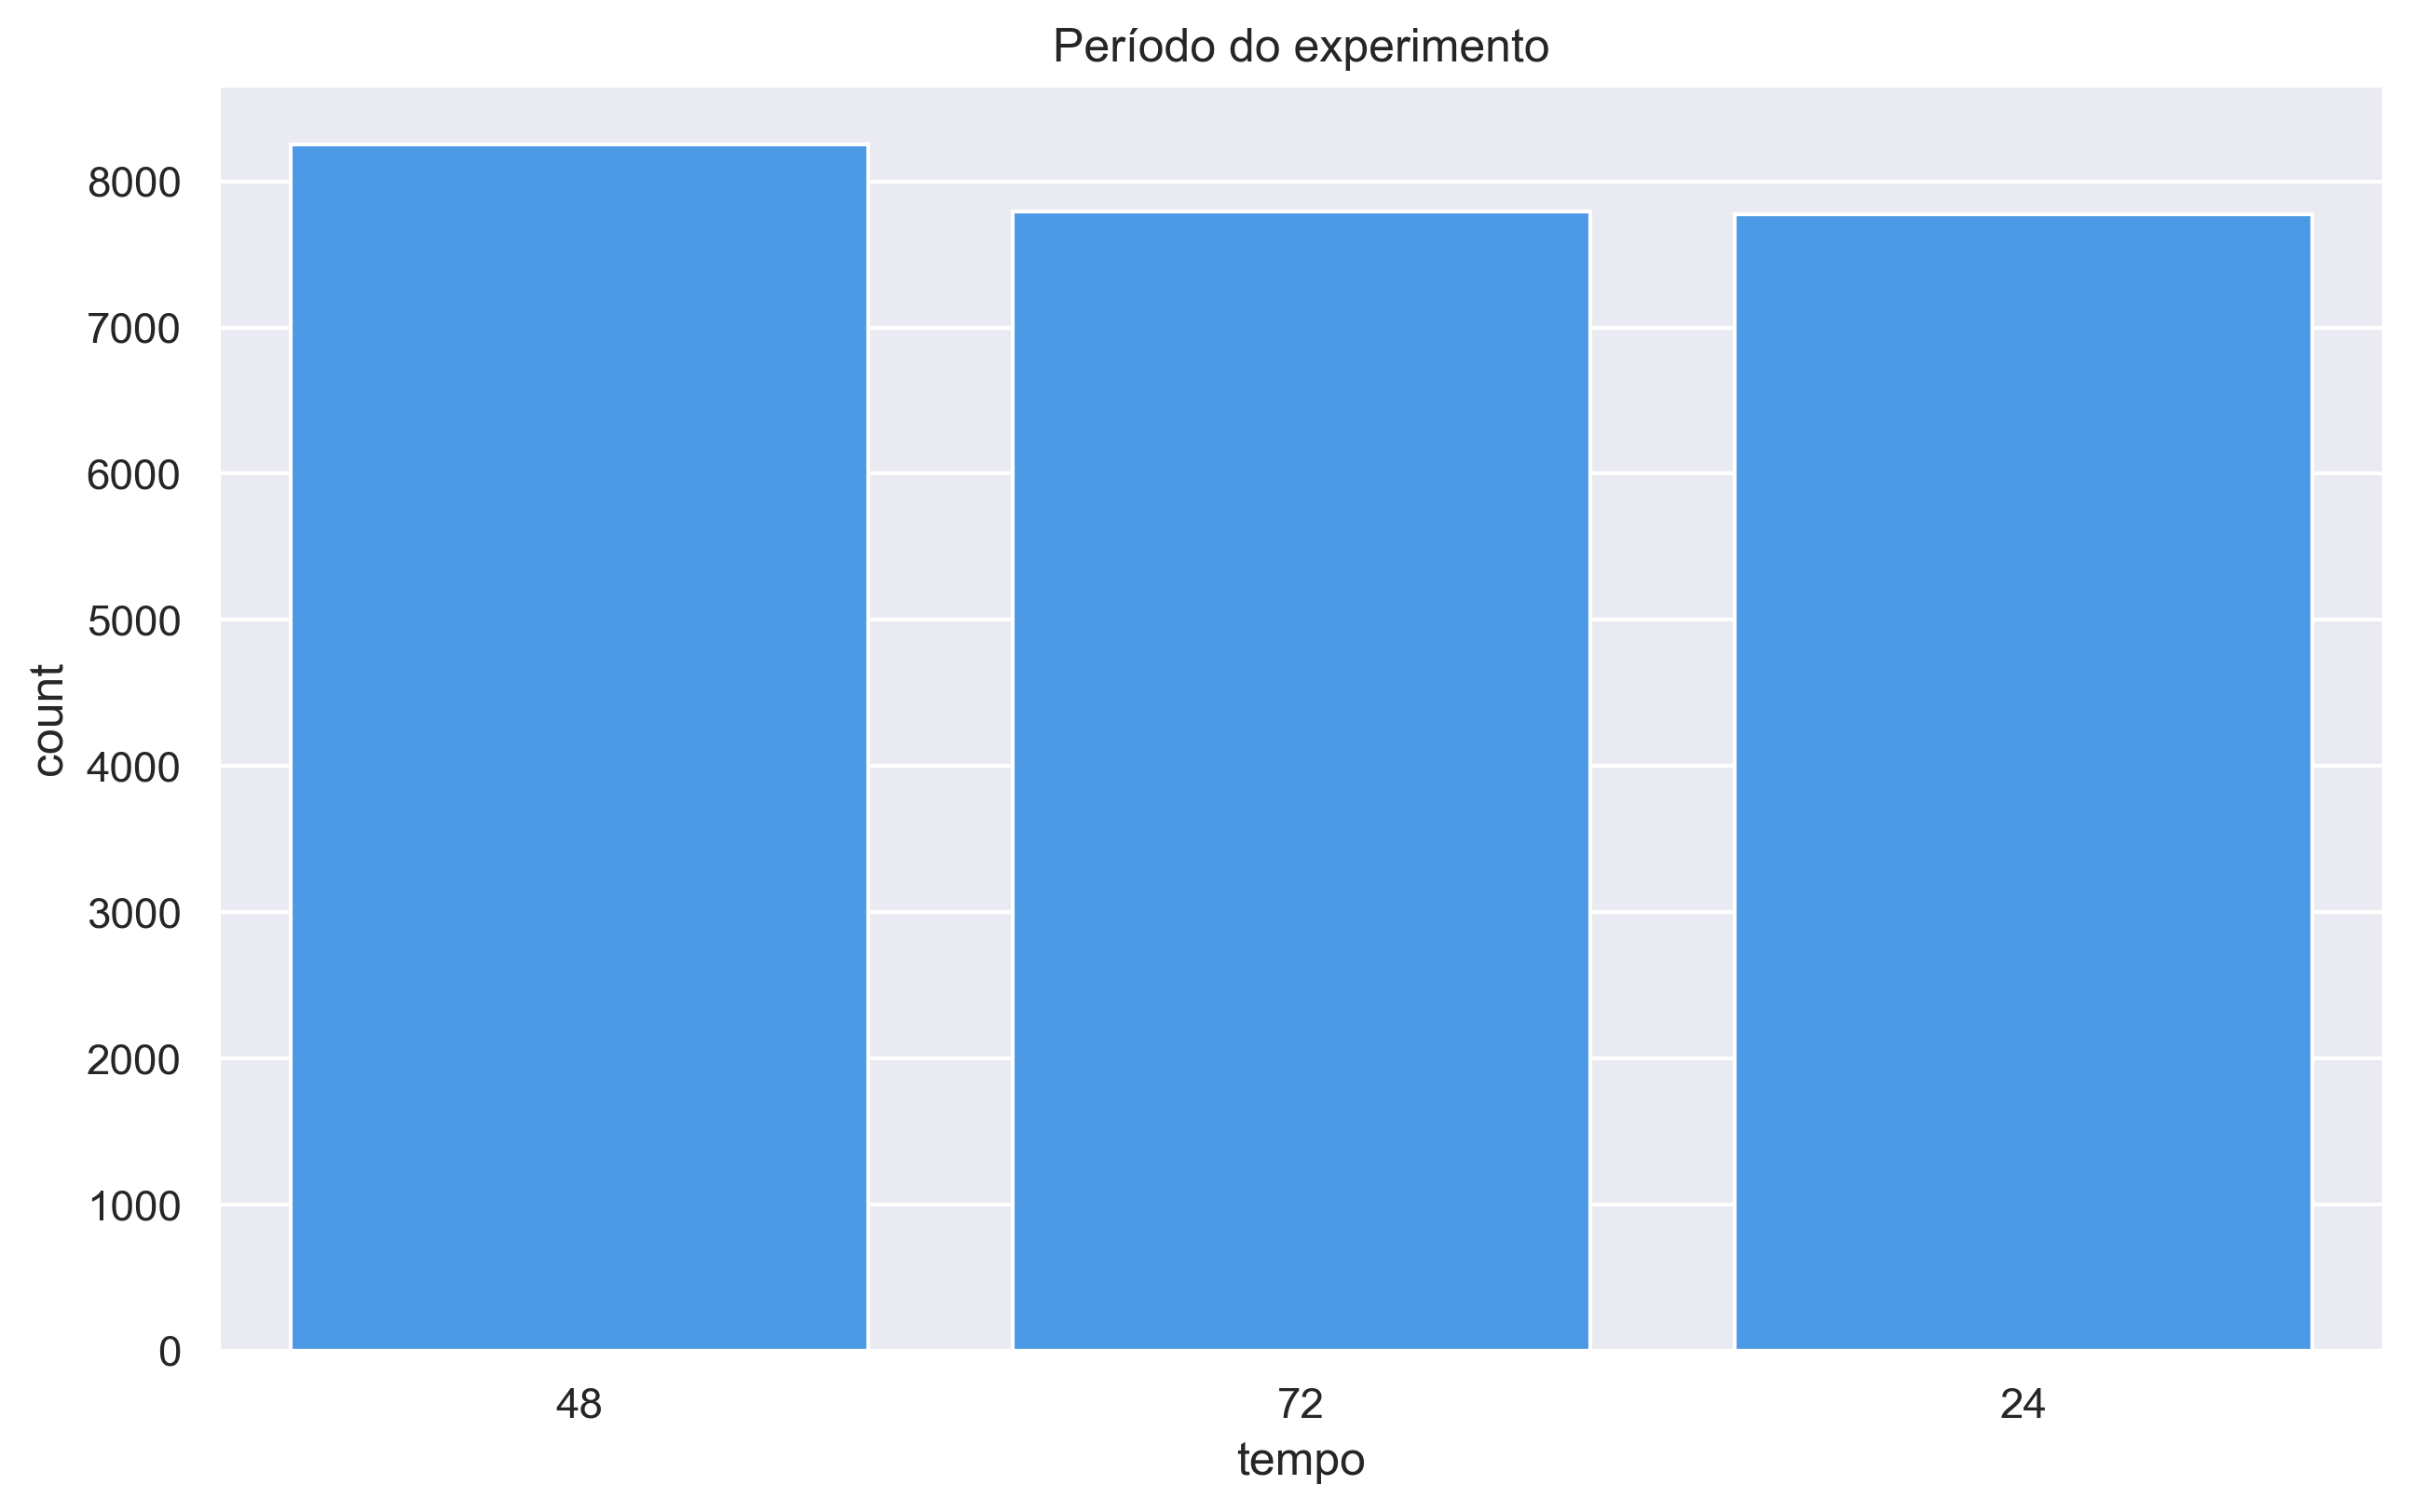

'Site para ver as palhetas de cores -> http://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette ou \nhttps://www.rapidtables.com/web/color/RGB_Color.html'

In [172]:
plt.figure(figsize=(10,6)) #Define tamanho da figura
sns.set(style='darkgrid') #Define estilo do grid de fundo
sns.countplot(x = data['tempo'],palette=['#3399FF'],order = data['tempo'].value_counts().index) #Define dados que utilizaremos e paleta de cores RGB das barras.
plt. title('Período do experimento') # Define o título
plt.show()
#Site para ver as palhetas de cores -> http://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette ou 
#https://www.rapidtables.com/web/color/RGB_Color.html

In [54]:
#Apagando linhas que não possuem valores de g-0 maiores que 0
data[data['g-0'] >0] 
#Salvando em variavél
#data_filtrados = data[data['g-0'] >0] 

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,...,0.8775,0.5230,0.1589,0.7715,0.5497,0.6929,0.3738,0.8636,0.4494,0.1218
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,...,0.0789,0.3538,0.0558,0.3377,-0.4753,-0.2504,-0.7415,0.8413,-0.4259,0.2434
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


## Desafio 01: Investigar por que a classe tratamento é tão desbalanceada?

Esse fator pode estar relacionado ao fato da única droga utilizada no controle ser a "cacb2b860". Portanto, o baixo percentual de utilização do controle se justifica devido ao alto número de drogas diferentes sendo aplicadas a cada cultura celular no tratamento "com_droga". 

## Desafio 02: Plotar as 5 últimas linhas da tabela

In [154]:
data.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Desafio 03: Proporção das classes tratamento.


In [159]:
data['tratamento'].value_counts(normalize = True) * 100 # 100 equivalendo à 100% (colocando em porcentagem)

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64

## Desafio 04: Quantas tipos de drogas foram investigados.

In [167]:
print('Foram investigadas {} drogas no presente experimento'.format(len(data['droga'])))

Foram investigadas 23814 drogas no presente experimento


## Desafio 05: Procurar na documentação o método query(pandas).

A documentação referente ao método "query" da biblioteca pandas, pode ser encontrado em https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

## Desafio 06: Renomear as colunas tirando o hífen.

In [169]:
data.columns.str.replace( '-', '' )

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2', 'g3',
       'g4',
       ...
       'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99'],
      dtype='object', length=877)

## Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot)

Tente realizar esse desafio durante as análises. Modificando o gráfico de pizza e os gráficos de barras.

## Desafio 08: Resumo do que você aprendeu com os dados